<div dir="rtl" lang="he" xml:lang="he">

# שכבת Embedding Layer 
שכבת הטמעה לוקחת יצוג של מילה שהוא מספר בודד ומציגה אותו כוקטור מספרים. 
יצוג מאפשר למפות מילים למספרים בצורה יותר חכמה, לדוגמה, מילים דומות יכולות להיות קרובות מבחינה וקטורית

In [1]:
import torch
from torchtext import vocab
MAX_DICT = 10
sentence_1 = "זה מאוד משעמם אותי"
sentence_2 = "זה לא יפה"
words = ['טעים','צבעוני','משעמם','יפה','בתוך','מתי','איך','האם']
dictionary = vocab.vocab({words[i]:i+1 for i in range(len(words))})
dictionary.set_default_index(0)


In [2]:
print(dictionary(sentence_1.split()))
print(dictionary(sentence_2.split()))

[0, 0, 2, 0]
[0, 0, 3]


In [3]:
embedding = torch.nn.Embedding(MAX_DICT,2)
senten_as_num = torch.tensor(dictionary(sentence_1.split()))
print(senten_as_num)
embedding.weight
senten_as_vecotr = embedding(senten_as_num)



tensor([0, 0, 2, 0])
האם -> tensor([ 0.4666, -1.2597])
איך -> tensor([0.0082, 1.0764])
מתי -> tensor([-0.0892,  0.5097])
יפה -> tensor([-0.5257,  1.9109])
משעמם -> tensor([0.9552, 0.1760])
בתוך -> tensor([-0.4203, -0.2917])
צבעוני -> tensor([-0.4481,  0.9074])
טעים -> tensor([-1.2901, -1.2554])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.4665721 -1.2597076
0.0081946505 1.0764452
-0.08918489 0.50966996
-0.5256693 1.9108516
0.95519394 0.17598633
-0.42031035 -0.29171914
-0.4480652 0.90739614
-1.2901348 -1.2553957


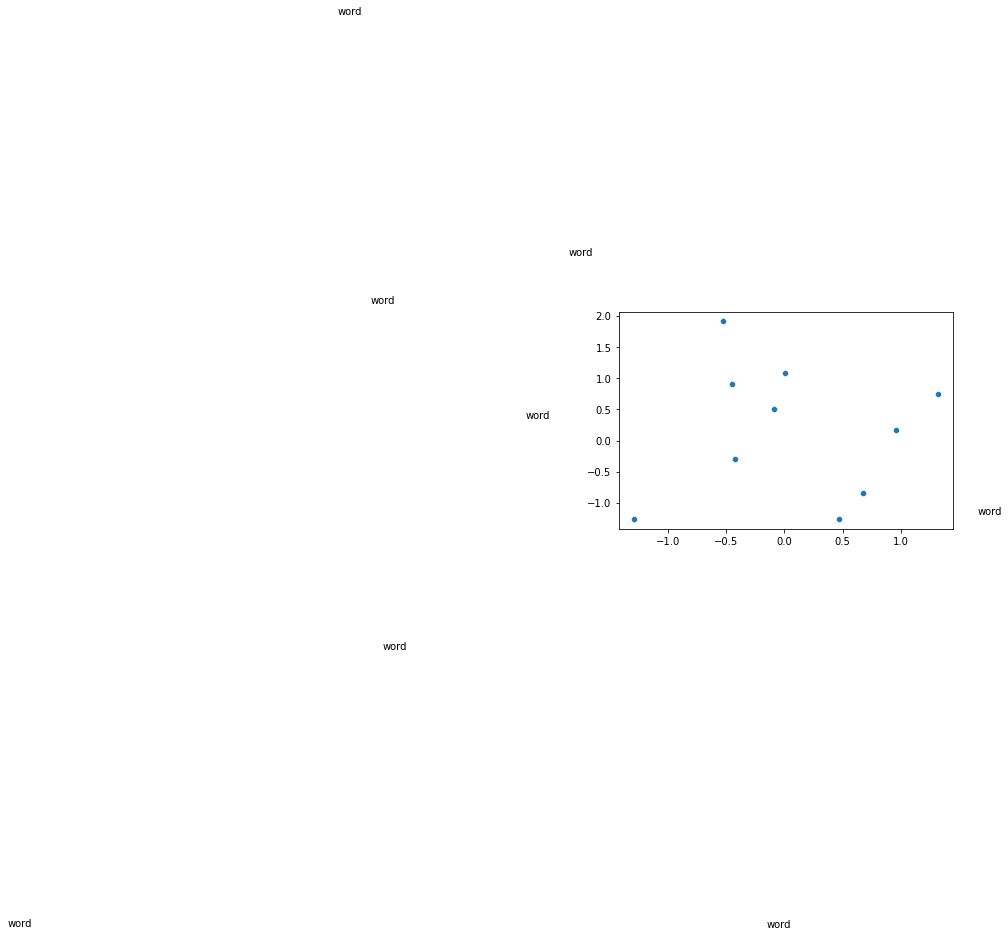

In [46]:
import seaborn as sns
x = embedding.weight.data.numpy().T[0]
y = embedding.weight.data.numpy().T[1]
plt = sns.scatterplot(*embedding.weight.data.numpy().T)
for word ,ind in dictionary.get_stoi().items():
  cor = embedding(torch.tensor([ind]))[0].data.numpy()
  x,y  = cor/
  plt.figure.text(x,y,"word")
  print(x,y)

In [24]:
print(embedding.weight.data.numpy().T[0])

[-1.2901348  -0.4480652   0.95519394 -0.5256693  -0.42031035 -0.08918489
  0.00819465  0.4665721   1.3179975   0.6775562 ]
